In [36]:
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib import image
import os
import cv2 as cv
import random

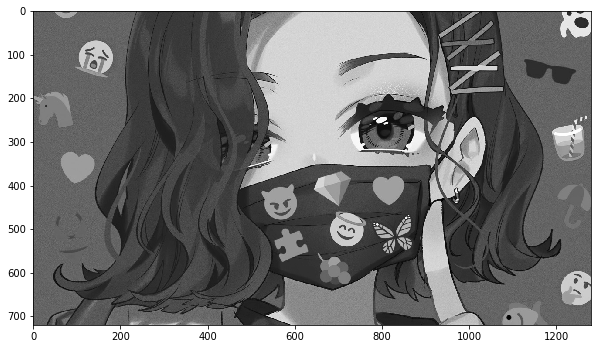

In [5]:
# Negative of image

img = cv.imread('Data/WhatsApp Image 2020-05-07 at 23.08.59.jpeg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(10,10))
plt.imshow(img, cmap='gray')
# cv.imshow('orig', img)

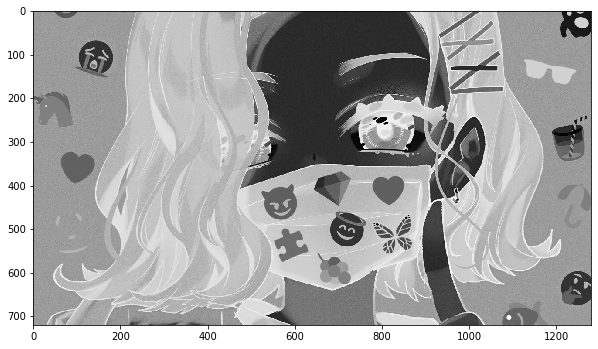

In [4]:
img_neg = np.max(img)-img


plt.figure(figsize=(10,10))
plt.imshow(img_neg, cmap='gray')

In [8]:
# Filtering/Neighborhood
# NxN Filter
def spatial_filter(filter_size, img):
  # Obtain number of rows and columns  
  # of the image 
  m, n = img.shape 
    
  # Develop Averaging filter(3, 3) mask 
  mask = np.ones([filter_size, filter_size], dtype = int) 
  mask = mask / filter_size**2
    
  # Convolve the 3X3 mask over the image  
  img_new = np.zeros([m, n]) 
  ls = []

  sub_fact = int(np.floor(filter_size/2))

  for i in range(1, m-sub_fact): 
      for j in range(1, n-sub_fact): 
          x = i-sub_fact
          temp = 0

          # Masking 
          for k in range(filter_size):
            y = j-sub_fact
            for l in range(filter_size):
              temp += img[x, y]*mask[k, l]
              y+=1           
            x+=1
          ls.append(temp)
          img_new[i, j] = temp

  return img_new

In [14]:
# Read the image 
img_s = img.copy()
filter_size = 14

i = filter_size
print("Starting the process\n")
img_filter = spatial_filter(i, img_s)
print(f"\n\n---------------------------------Filter Size : {i}X{i}---------------------------------\n\n")

Starting the process



---------------------------------Filter Size : 14X14---------------------------------




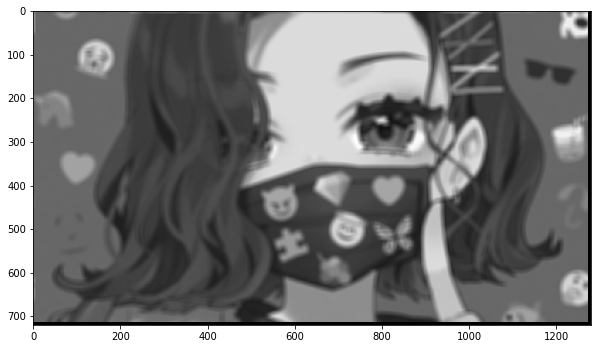

In [15]:
plt.figure(figsize=(10, 10))
plt.imshow(img_filter, cmap='gray')

$g[x,y] = 1/mn \sum \limits _{(r,c)} ^{} f[r,c] $

In [30]:
# Weighted Filtering
# NxN Filter
def spatial_filter(filter_size, img):
  # Obtain number of rows and columns  
  # of the image 
  m, n = img.shape 
    
  # Develop Averaging filter(3, 3) mask 
  mask = np.array( [[1/64,1/64,1/64],
                    [1/64,16/64,1/64],
                    [1/64,1/64,1/64]] )
    
  img_new = np.zeros([m, n]) 
  ls = []

  sub_fact = int(np.floor(filter_size/2))

  for i in range(1, m-sub_fact): 
      for j in range(1, n-sub_fact): 
          x = i-sub_fact
          temp = 0

          # Masking 
          for k in range(filter_size):
            y = j-sub_fact
            for l in range(filter_size):
              temp += img[x, y]*mask[k, l]
              y+=1           
            x+=1
          ls.append(temp)
          img_new[i, j] = temp

  return img_new

In [31]:
# Read the image 
img_s1 = img.copy()
filter_size = 3

i = filter_size
print("Starting the process\n")
img_filter1 = spatial_filter(i, img_s1)
print(f"\n\n---------------------------------Filter Size : {i}X{i}---------------------------------\n\n")

Starting the process



---------------------------------Filter Size : 3X3---------------------------------




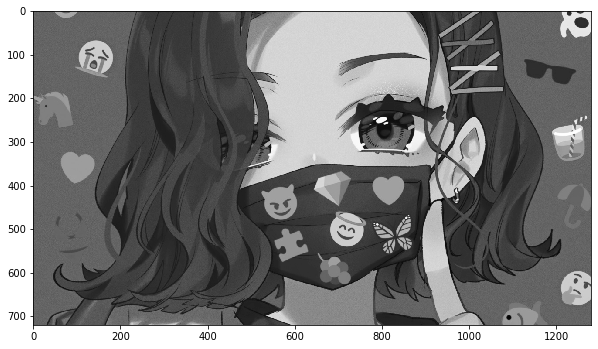

In [32]:
plt.figure(figsize=(10, 10))
plt.imshow(img_filter1, cmap='gray')

In [37]:
# Adding Salt-Pepper Noise
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

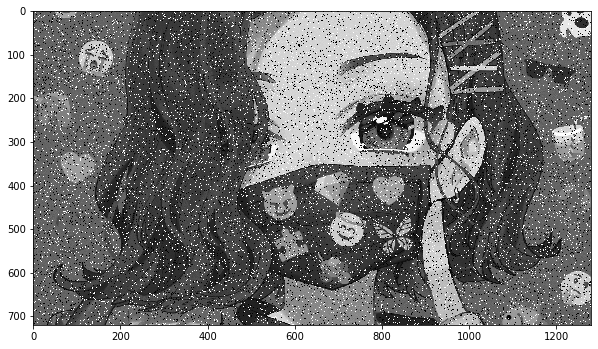

In [38]:
noise_img = sp_noise(img, 0.05)

plt.figure(figsize=(10,10))
plt.imshow(noise_img, cmap='gray')

In [40]:
# Obtain the number of rows and columns  
# of the image 
# Applying Median Filter
img_noisy1 = noise_img.copy()
m, n = img_noisy1.shape 
   
# Traverse the image. For every 3X3 area,  
# find the median of the pixels and 
# replace the ceter pixel by the median 
img_new1 = np.zeros([m, n]) 
  
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = [img_noisy1[i-1, j-1], img_noisy1[i-1, j], 
               img_noisy1[i-1, j + 1], img_noisy1[i, j-1], 
               img_noisy1[i, j], img_noisy1[i, j + 1], 
               img_noisy1[i + 1, j-1], img_noisy1[i + 1, j], 
               img_noisy1[i + 1, j + 1]] 
          
        temp = sorted(temp) 
        img_new1[i, j]= temp[4] 
  
# img_new1 = img_new1.astype(np.uint8) 
# cv2.imwrite('new_median_filtered.png', img_new1) 

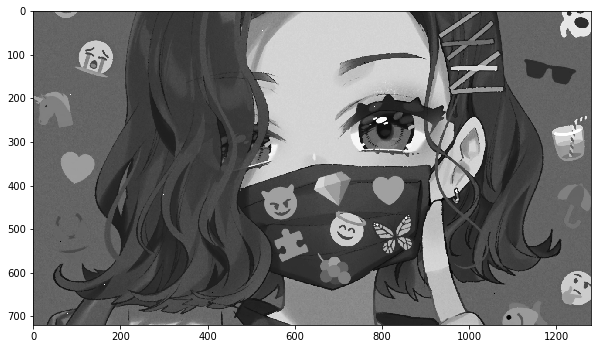

In [44]:
plt.figure(figsize=(10,10))
plt.imshow(img_new1, cmap='gray')

$ f[r,c] = w[i,j]*F[r,c] $

where (i,j) are the corresponding filter indices